In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [208]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [209]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [210]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

APPLE VISION PRO

In [211]:
def text_analysis(corpus):
  corpus_data = pd.read_csv(corpus, delimiter="\t")
  corpus_comments = corpus_data['comments']
  corpus_comments_strings = str(corpus_comments)
  corpus_tokens = nltk.tokenize.word_tokenize(corpus_comments_strings)
  corpus_comments_clean = [ps.stem(word) for word in corpus_tokens if word.isalpha() if not word in set(stopwords.words('english'))]
  freq_dist = nltk.FreqDist(corpus_comments_clean)
  freq_dist.plot(40, cumulative=True)
  corpus_text = nltk.Text(corpus_comments_strings)
  print('\n')
  freq_dist.tabulate(10)
  print(f'\n Amount of Words: {len(corpus_tokens)}')
  print(f'\n Vocabulary: {sorted(set(corpus_tokens))}')
  print(f'\n Vocabulary Size: {len(set(corpus_tokens))}')
  print('\n')
  print(f'\n Amount of Words in Clean Corpus: {len(corpus_comments_clean)}')
  print(f'\n Vocabulary Clean Corpus: {sorted(set(corpus_comments_clean))}')
  print(f'\n Vocabulary Size of Clean Corpus: {len(set(corpus_comments_clean))}')
  #print(corpus_comments_clean[:-2])
  wordcloud = WordCloud(width = 1400,
                      height = 800,
                      stopwords = stop_words,
                      min_font_size = 12,
                      random_state=1,
                      collocations=True,
                      colormap='cividis').generate(' '.join(corpus_tokens))
  plt.figure(figsize = (10, 6), facecolor = None)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.savefig(f'wordcloud {corpus}.png', format='png', dpi=150, bbox_inches='tight')
  plt.axis('off')
  plt.show()

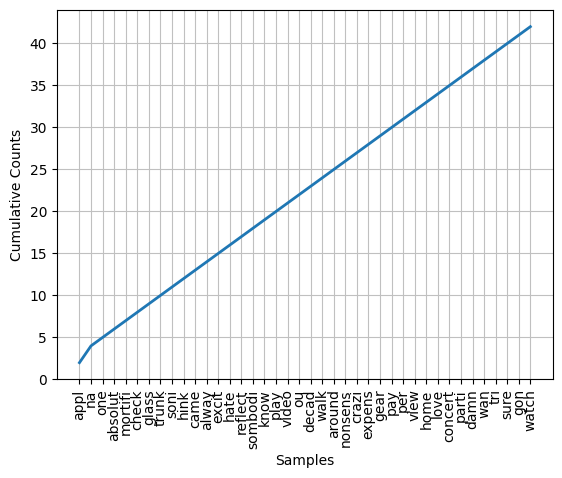



   appl      na     one absolut mortifi   check   glass   trunk    soni    hink 
      2       2       1       1       1       1       1       1       1       1 

 Amount of Words: 125

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'a', 'about', 'absolutely', 'after', 'all', 'always', 'am', 'and', 'apple', 'around', 'at', 'be', 'breakdo', 'came', 'can', 'check', 'comments', 'concert', 'couple', 'crazy', 'damn', 'days', 'decade', 'does', 'dtype', 'exciting', 'expensive', 'for', 'from', 'gear', 'glass', 'gon', 'hate', 'hink', 'holones', 'home', 'i', 'in', 'is', 'it', 'its', 'know', 'll', 'love', 'microssoft', 'mine', 'mortified', 'na', 'new', 'nonsense', 'object', 'of', 'on', 'one', 'only', 'ou', 'parties', 'pay', 'per', 'play', 'pri', 'reflect', 'returned', 'risky', 's', 'sombody', 'sony', 'sure', 'that', 'the', 'this', 'to', 'trunk', 'try', 'uhhh', 'video', 'view', 'walking', 'wan', 'watch', 'we', 'who', 'why', 'wi

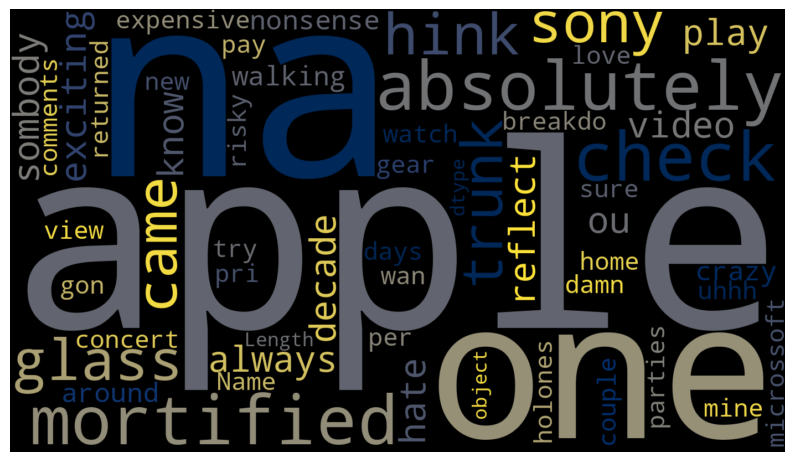

In [212]:
text_analysis('apple_vision_pro_one_comments.txt')

In [213]:
def likes(text,amount,direction):
  data = pd.read_csv(text)
  data_frame = pd.DataFrame(data)
  by_likes = data_frame.loc[:, ['amount_of_likes', 'comment']].drop_duplicates().sort_values(by='amount_of_likes', ascending=direction, ignore_index=True)[:amount]
  return by_likes

In [214]:
likes('apple_vision_pro_one.txt', 10, False)

,amount_of_likes,comment
0,2,craaaaaaaaaaap
1,1,im out...why should anyone pay to facetime a p...
2,1,Just tested it. I also tested the Pico 4 and q...
3,1,I returned mine after a couple of days. The pr...
4,1,The way Marques Says ''It's the Best iv seen''...
5,1,This nonsense crazy expensive gear from Apple ...
6,1,Ok we can all agree that this is stupid 😂
7,1,We will all be wearing advanced versions of th...
8,1,Never saw a review from Marquee that sounds so...
9,0,Vr part of this looka alot like samsungs vr fr...


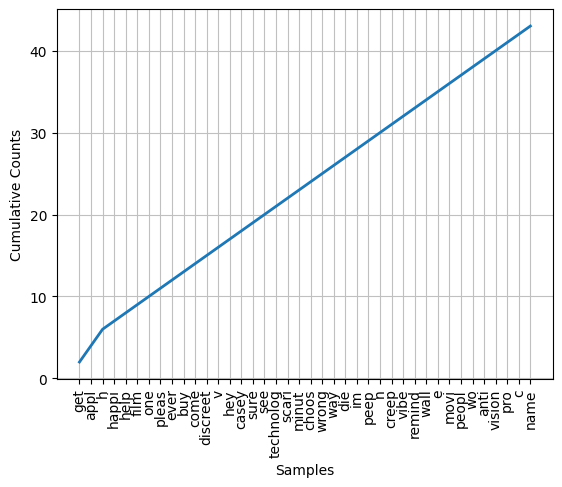



  get  appl     h happi  help  film   one pleas  ever   buy 
    2     2     2     1     1     1     1     1     1     1 

 Amount of Words: 110

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'a', 'about', 'anti', 'apple', 'as', 'buy', 'by', 'c', 'casey', 'choose', 'comes', 'comments', 'creep', 'discreet', 'don', 'dtype', 'dying', 'e', 'ever', 'film', 'getting', 'h', 'had', 'happy', 'help', 'hey', 'i', 'if', 'im', 'in', 'is', 'it', 'll', 'm', 'me', 'minute', 'more', 'movie', 'n', 'not', 'object', 'of', 'one', 'peep', 'people', 'please', 'pro', 'reminds', 'scary', 'see', 'sure', 't', 'technology', 'that', 'the', 'this', 'to', 'v', 'very', 'vibes', 'vision', 'wall', 'way', 'when', 'where', 'will', 'wo', 'wrong', 'you']

 Vocabulary Size: 85



 Amount of Words in Clean Corpus: 47

 Vocabulary Clean Corpus: ['anti', 'appl', 'buy', 'c', 'casey', 'choos', 'come', 'comment', 'creep', 'die', 'discreet', 'dtype', 'e', 'eve

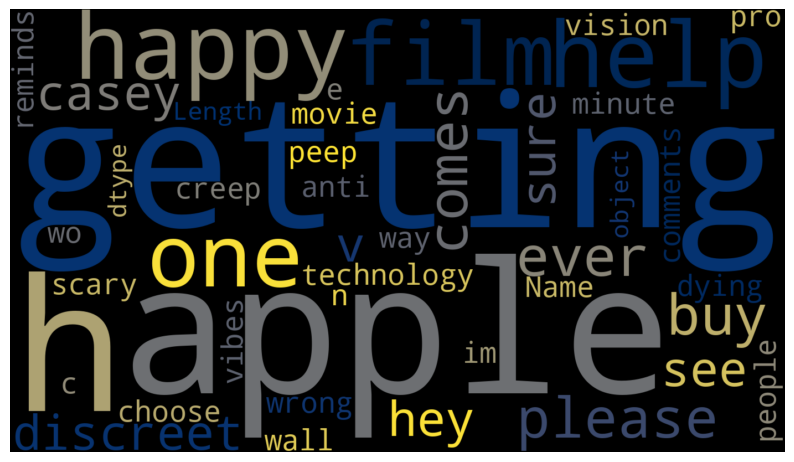

In [215]:
text_analysis('apple_vision_pro_two_comments.txt')

In [216]:
likes('apple_vision_pro_two.txt', 10, False)

,amount_of_likes,comment
0,21497,Happy to help film this one! Please don’t ever...
1,1,Congratulations I got sick watching this
2,1,"Its insane, but I honestly think these things ..."
3,1,Everybody saying that it doesn’t cost 4000$. B...
4,1,Apple really know how to make lot's of punk po...
5,1,We already have our phones in our faces 24/7 a...
6,1,The next step is an implant.😔
7,1,Jesus is the truth!
8,1,Jesus is the way!
9,1,Jesus is coming!


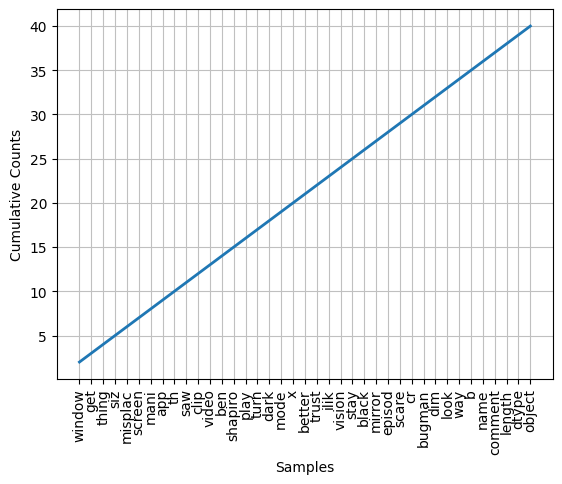



 window     get   thing     siz misplac  screen    mani     app      th     saw 
      2       1       1       1       1       1       1       1       1       1 

 Amount of Words: 107

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'a', 'and', 'any', 'apps', 'are', 'b', 'ben', 'better', 'black', 'bugman', 'can', 'clip', 'comments', 'cr', 'dark', 'dim', 'down', 'dtype', 'episodes', 'from', 'get', 'have', 'how', 'i', 'if', 'ilike', 'in', 'is', 'it', 'just', 'looking', 'many', 'mirror', 'misplaced', 'mode', 'object', 'of', 'off', 'on', 'plays', 're', 's', 'saw', 'scare', 'screen', 'shapiro', 'siz', 'some', 'stays', 'th', 'the', 'these', 'they', 'things', 'this', 'to', 'trust', 'turn', 'video', 'vision', 'way', 'we', 'what', 'when', 'why', 'windows', 'x', 'you']

 Vocabulary Size: 84



 Amount of Words in Clean Corpus: 40

 Vocabulary Clean Corpus: ['app', 'b', 'ben', 'better', 'black', 'bugman', 'clip', 'comment', 'c

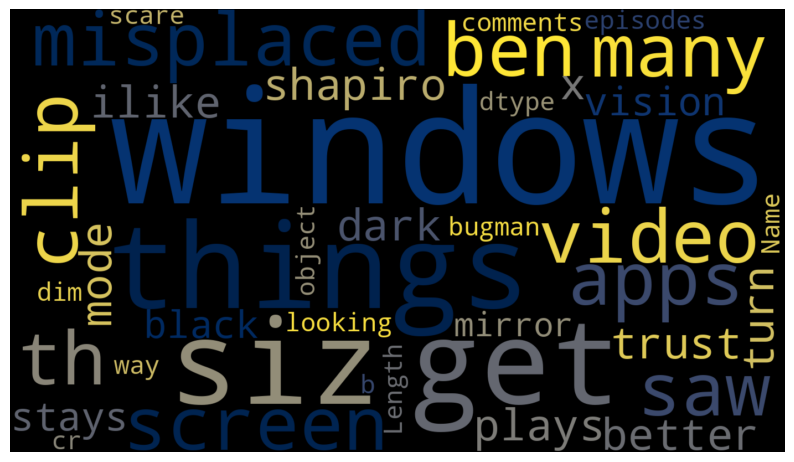

In [217]:
text_analysis('apple_vision_pro_three_comments.txt')

In [218]:
likes('apple_vision_pro_three.txt', 10, False)

,amount_of_likes,comment
0,3,"expensive price, and the floating screens stil..."
1,2,what a waste of money
2,2,Wow this looks so cool 😮
3,2,I'll see you guys in 3 years when we get recom...
4,2,Start of something legendary
5,1,"they shouldve gone for building a car, its mor..."
6,1,this is so fake
7,1,You can get the same experience with the oculu...
8,1,Knowing myself I’d end up using it for all the...
9,1,wow this looks cool!


META QUEST

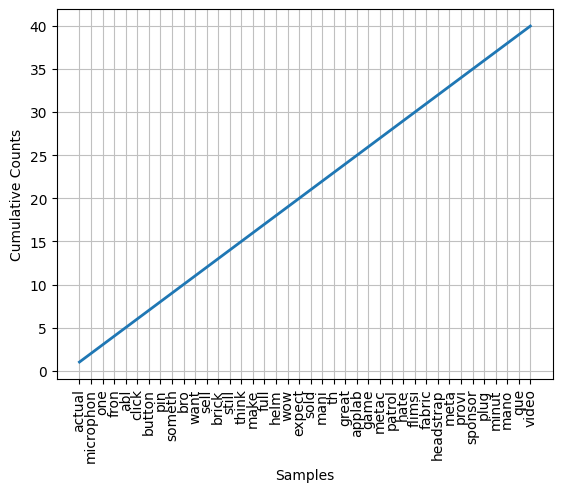



   actual microphon       one      fron       abl     click    button       pin    someth       bro 
        1         1         1         1         1         1         1         1         1         1 

 Amount of Words: 112

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'a', 'able', 'accessories', 'actually', 'an', 'applab', 'are', 'be', 'being', 'bricked', 'bro', 'but', 'button', 'calling', 'click', 'comments', 'did', 'dtype', 'expect', 'fabric', 'flimsy', 'foda', 'for', 'fron', 'full', 'games', 'great', 'hated', 'have', 'headstrap', 'helme', 'i', 'in', 'irony', 'it', 'making', 'mano', 'many', 'meta', 'metacity', 'microphones', 'minutes', 'my', 'not', 'object', 'oculus', 'of', 'on', 'one', 'parabens', 'patrol', 'pelo', 'pin', 'plugs', 'provi', 'que', 'quest', 'sell', 'should', 'so', 'sold', 'some', 'something', 'sponsors', 'still', 'th', 'the', 'there', 'they', 'think', 'to', 'trabalho', 'video', 'wanted', 'wow']

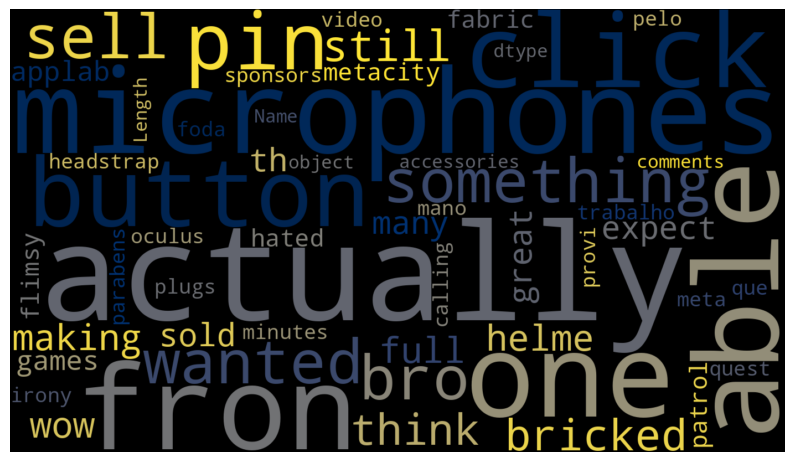

In [219]:
text_analysis('meta_quest_3_one_comments.txt')

In [220]:
likes('meta_quest_3_one.txt', 10, False)

,amount_of_likes,comment
0,728,"10:48 There are actually 3 microphones, one on..."
1,3,Gotta say $3500 seems like alot for Vision PRO...
2,2,You’re really trying to sell a thin ass jacket...
3,2,If you think they LOST $47B on research and de...
4,2,It'll be hard to get an actual expert and unbi...
5,1,Not gonna buy that dog shit without oled lense...
6,1,Watched this after your Vision Pro review. I’d...
7,1,los de Apple son mejores\npor ahora..\nTambién...
8,1,"13:11 Well, this didn't age well...\n\n\n\n(if..."
9,1,Apple just winning the game look at the interf...


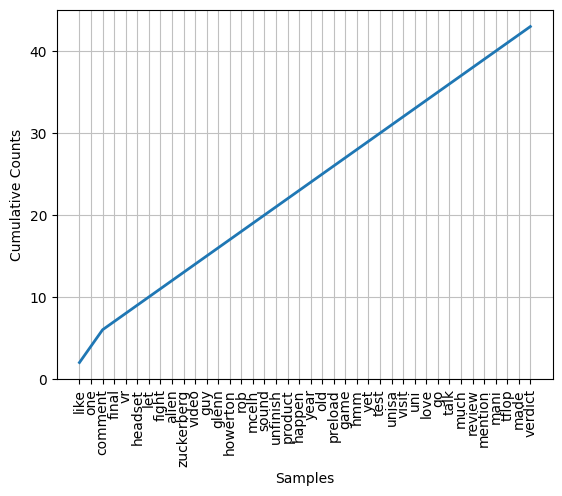



      like        one    comment      final         vr    headset        let      fight      alien zuckerberg 
         2          2          2          1          1          1          1          1          1          1 

 Amount of Words: 108

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'a', 'about', 'after', 'aliens', 'an', 'and', 'comment', 'comments', 'dtype', 'fight', 'finally', 'game', 'glenn', 'going', 'guy', 'happens', 'have', 'headset', 'here', 'hmm', 'how', 'howerton', 'i', 'in', 'is', 'it', 'lets', 'like', 'love', 'made', 'many', 'mcelhe', 'me', 'mention', 'most', 'much', 'my', 'no', 'not', 'o', 'object', 'old', 'on', 'one', 'precisely', 'preloads', 'product', 'review', 'rob', 'sounds', 'talk', 'tested', 'tflops', 'that', 'the', 'this', 'to', 'tr', 'unfinished', 'uni', 'unisa', 'verdict', 'video', 'visited', 'vr', 'what', 'when', 'year', 'yet', 'zuckerberg']

 Vocabulary Size: 86



 Amount of Words i

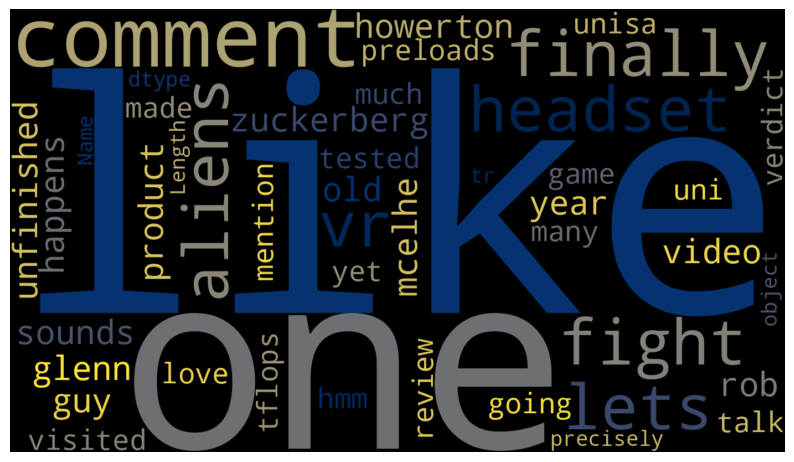

In [221]:
text_analysis('meta_quest_3_two_comments.txt')

In [222]:
likes('meta_quest_3_two.txt', 10, False)

,amount_of_likes,comment
0,16,To all the new people in VR you can use the Qu...
1,9,Honestly it should be 10. The mixed reality pi...
2,9,Finally. A solid jumping off point. You could ...
3,6,Still about 10 years away from vr being breath...
4,4,Vegas infinite is a sick game if ur into poker...
5,4,Wow? this tech is incredible. You just let the...
6,4,Here after the Zuckerberg video
7,3,They really need to invest in better and more ...
8,3,Brilliant review. Thorough and so helpful. Tha...
9,3,Awesome review! The guy reviewing did a great ...


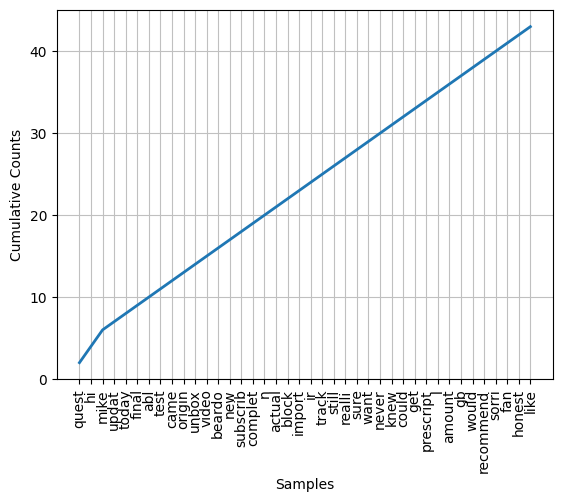



 quest     hi   mike  updat  today  final    abl   test   came origin 
     2      2      2      1      1      1      1      1      1      1 

 Amount of Words: 121

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'a', 'able', 'actually', 'am', 'amount', 'an', 'and', 'are', 'be', 'beardo', 'blocking', 'but', 'came', 'can', 'comments', 'completely', 'could', 'cureently', 'dtype', 'fans', 'finally', 'for', 'from', 'gb', 'get', 'have', 'help', 'hi', 'hon', 'honest', 'hope', 'i', 'if', 'important', 'ir', 'knew', 'l', 'like', 'll', 'm', 'me', 'mike', 'n', 'never', 'new', 'not', 'object', 'of', 'original', 'prescription', 'quest', 're', 'really', 'recommend', 'sorry', 'still', 'subscriber', 'sure', 'test', 'the', 'to', 'today', 'track', 'unboxing', 'update', 'video', 'want', 'was', 'what', 'would', 'you', 'your']

 Vocabulary Size: 88



 Amount of Words in Clean Corpus: 52

 Vocabulary Clean Corpus: ['abl', 'actual', 'amo

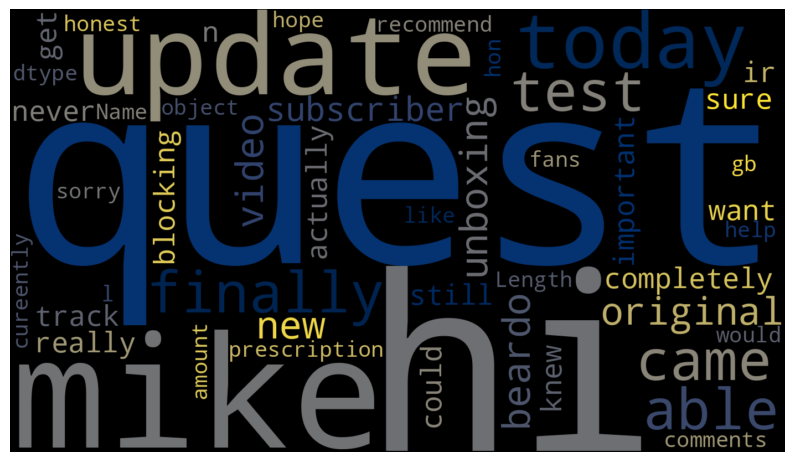

In [223]:
text_analysis('meta_quest_3_three_comments.txt')

In [224]:
likes('meta_quest_3_three.txt', 10, False)

,amount_of_likes,comment
0,109,18/10/23 - Update! Today I was finally able to...
1,2,I see what you did at 1:48. You're right...nev...
2,1,"Aight, time to get one."
3,1,I got the Quest 3 for Christmas. I came from ...
4,1,the new standard when it's LCD not OLED how?
5,1,Lucky you get free quest 3
6,1,Do you pay for the games on the quest
7,1,great video and review. a quick question howe...
8,1,"Just ordered one, should be a nice jump in res..."
9,1,I would really wanted to see through the lens ...


PSVR

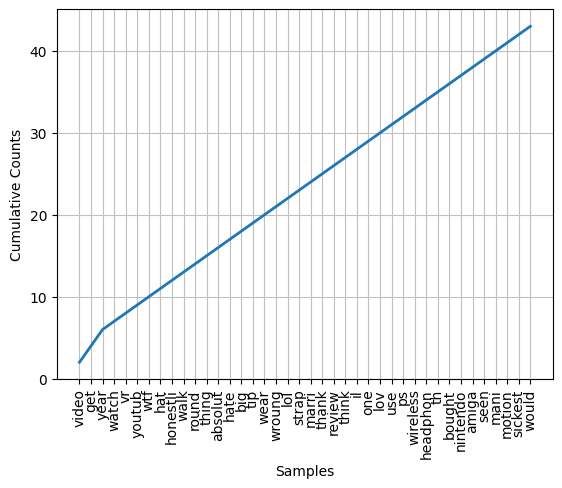



   video      get     year    watch       vr   youtub      wtf      hat honestli     walk 
       2        2        2        1        1        1        1        1        1        1 

 Amount of Words: 123

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'a', 'about', 'absolutely', 'after', 'amiga', 'and', 'another', 'be', 'big', 'bought', 'can', 'comments', 'did', 'do', 'dtype', 'for', 'get', 'hat', 'hate', 'he', 'headphones', 'honestly', 'how', 'i', 'il', 'is', 'it', 'lol', 'lov', 'many', 'married', 'motion', 'nintendo', 'object', 'of', 'on', 'one', 'only', 'or', 'ps', 'review', 'round', 'seen', 'sickest', 'so', 'strap', 't', 'th', 'thank', 'the', 'then', 'thing', 'think', 'this', 'tip', 'use', 'videos', 'vr', 'wait', 'walk', 'was', 'watch', 'wearing', 'why', 'wireless', 'with', 'would', 'wroung', 'wtf', 'year', 'you', 'youtube']

 Vocabulary Size: 88



 Amount of Words in Clean Corpus: 50

 Vocabulary Clean Corpus

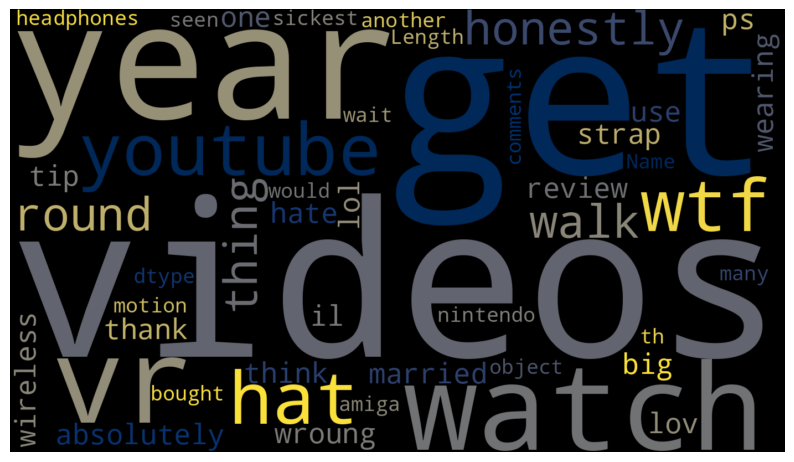

In [225]:
text_analysis('psvr_one_comments.txt')

In [226]:
likes('psvr_one.txt', 10, False)

,amount_of_likes,comment
0,2,"My gf might kill me but fuck it, lets go!!!!!"
1,2,I want to buy it right now but I'm afraid I'll...
2,2,Great review
3,2,I love the headset but the games that come wit...
4,2,Flawless video!
5,2,Nicely done and thank you🍀🍀🍀🍀
6,2,DO NOT BUY PSVR2. all these fake influencers k...
7,1,getting one for xmas :)
8,1,Sony should pay you you convinced me to buy my...
9,1,Lack of PSVR1 backwards compatibility is just ...


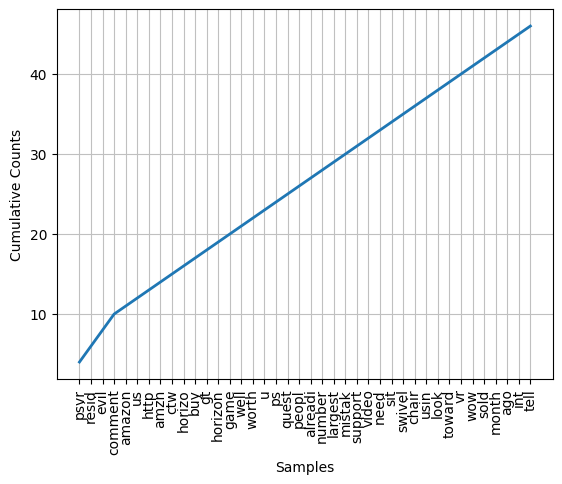



   psvr   resid    evil comment  amazon      us    http    amzn     ctw  horizo 
      4       2       2       2       1       1       1       1       1       1 

 Amount of Words: 128

 Vocabulary: [',', '...', '0', '1', '2', '3', '361', '362', '363', '364', '365', '366', '4', ':', 'Length', 'Name', 'a', 'about', 'ago', 'already', 'am', 'amazon', 'amzn', 'and', 'anyone', 'because', 'buying', 'can', 'chair', 'commented', 'comments', 'ctw', 'down', 'dtype', 'evil', 'few', 'find', 'g', 'games', 'gt', 'had', 'have', 'he', 'horizo', 'horizon', 'https', 'i', 'if', 'int', 'is', 'it', 'largest', 'looking', 'm', 'mistake', 'months', 'my', 'need', 'not', 'number', 'object', 'on', 'one', 'own', 'people', 'ps', 'psvr', 'quest', 'resident', 's', 'sit', 'sold', 'something', 'still', 'support', 'swivel', 't', 'tell', 'that', 'the', 'to', 'towards', 'u', 'us', 'usin', 'videos', 'vr', 'wait', 'was', 'wasn', 'well', 'when', 'will', 'worth', 'wow']

 Vocabulary Size: 95



 Amount of Words in Clean Co

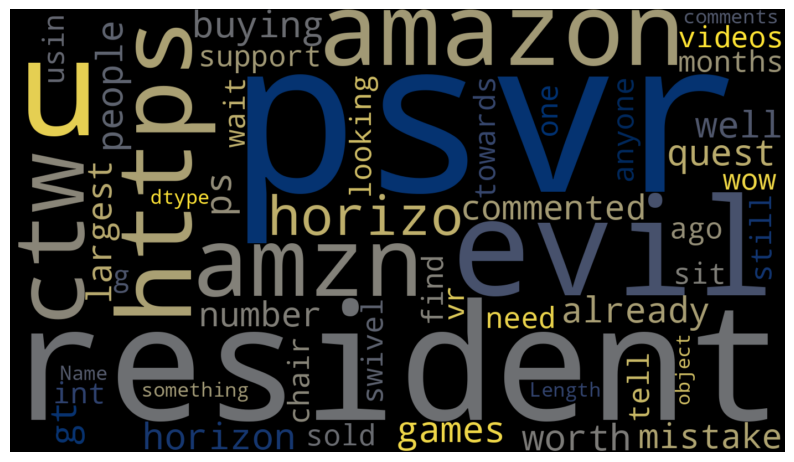

In [227]:
text_analysis('psvr_two_comments.txt')

In [228]:
likes('psvr_two.txt', 10, False)

,amount_of_likes,comment
0,29,PSVR2's big mistake was not supporting PC. Now...
1,11,"Great headset i love mine, eye tracking, hapti..."
2,10,"Red Matter 2, Crossfire Sierra Squad, Hubris, ..."
3,9,I cant believe they havent put out a new astro...
4,8,No VRChat..... that's a shame
5,8,"I sold mine after 5 months. Comfort, tracking ..."
6,8,I’m excited for Resident Evil 4 VR mode. It ...
7,6,I was sooooo looking forward to the PSVR2...th...
8,6,Cool headset. Too bad you can´t really use it ...
9,6,Capcom has figured it out with Resident Evil f...


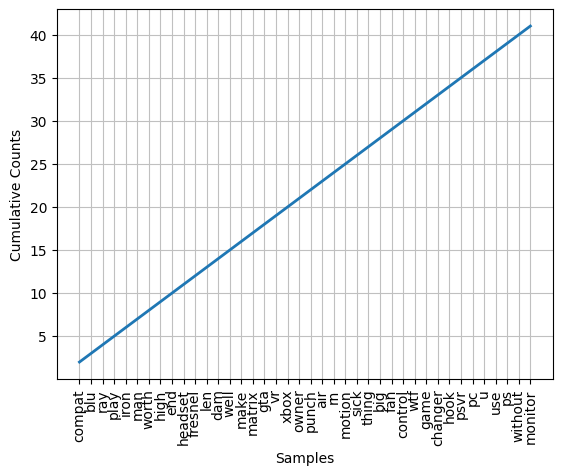



 compat     blu     ray    play    iron     man   worth    high     end headset 
      2       1       1       1       1       1       1       1       1       1 

 Amount of Words: 108

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'a', 'air', 'and', 'are', 'be', 'big', 'blu', 'can', 'changer', 'comments', 'compatible', 'controller', 'd', 'dam', 'dtype', 'end', 'fan', 'fresnel', 'game', 'gta', 'has', 'headset', 'high', 'hook', 'how', 'if', 'in', 'iron', 'is', 'it', 'lens', 'making', 'man', 'matrix', 'monitor', 'motion', 'not', 'now', 'object', 'of', 'on', 'owners', 'pc', 'play', 'ps', 'psvr', 'punching', 'ray', 'rn', 's', 'sickness', 't', 'that', 'the', 'they', 'thing', 'this', 'to', 'tv', 'u', 'up', 'use', 'vr', 'well', 'when', 'with', 'without', 'worth', 'wtf', 'xbox', 'you']

 Vocabulary Size: 87



 Amount of Words in Clean Corpus: 47

 Vocabulary Clean Corpus: ['air', 'big', 'blu', 'changer', 'comment', 'compa

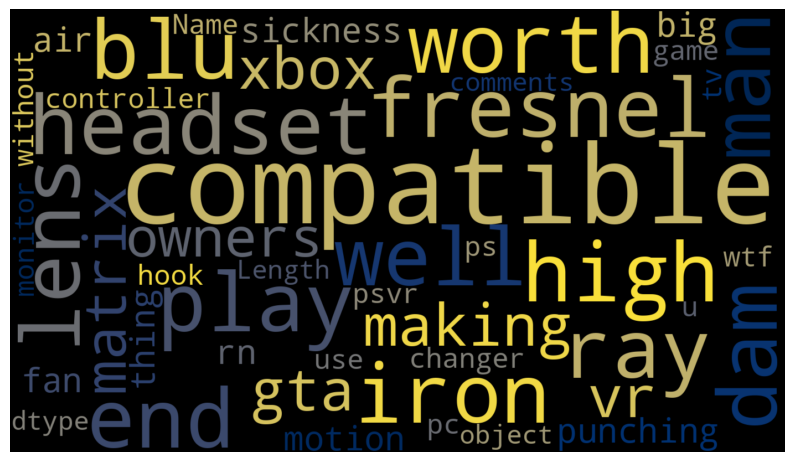

In [229]:
text_analysis('psvr_three_comments.txt')

In [230]:
likes('psvr_three.txt', 10, False)

,amount_of_likes,comment
0,54,Just received it and omg. I’ve worked on VR g...
1,4,We just gave the government an internal templa...
2,3,Not backwards compatible with ps4 vr games is ...
3,2,high end headset with Fresnel lens in 2024 is ...
4,2,xbox owners punching the air rn
5,1,Why can’t you play regular games like in a big...
6,1,There is a game called Pistol Whip its like do...
7,1,Im waiting on mine to come in the mail 😬😬😊
8,1,This really separates the ps5 from the Xbox
9,1,Why isn't anybody talking about 3D BR support


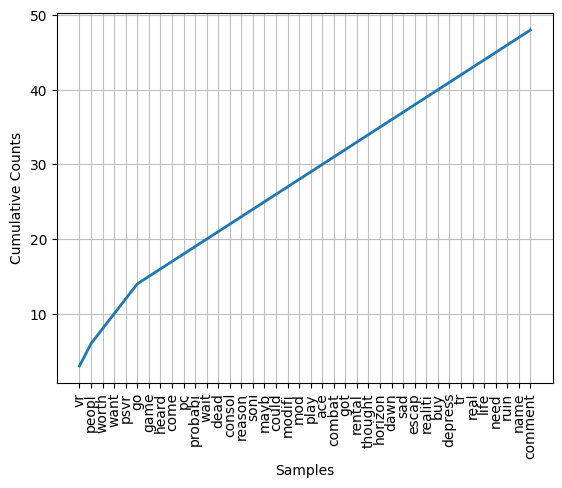



   vr peopl worth  want  psvr    go  game heard  come    pc 
    3     3     2     2     2     2     1     1     1     1 

 Amount of Words: 128

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'a', 'ace', 'all', 'and', 'are', 'buy', 'combat', 'coming', 'comments', 'consoles', 'could', 'dawn', 'dead', 'depressed', 'dtype', 'escape', 'games', 'going', 'got', 'having', 'heard', 'horizon', 'i', 'is', 'it', 'its', 'just', 'life', 'll', 'maybe', 'mod', 'modify', 'need', 'not', 'object', 'on', 'only', 'pc', 'people', 'play', 'probaby', 'psvr', 'real', 'reality', 'reason', 'rental', 'ruin', 's', 'sad', 'so', 'sony', 't', 'that', 'the', 'them', 'there', 'they', 'this', 'thought', 'to', 'tr', 've', 'vr', 'wait', 'want', 'wanted', 'was', 'who', 'worth', 'you']

 Vocabulary Size: 86



 Amount of Words in Clean Corpus: 51

 Vocabulary Clean Corpus: ['ace', 'buy', 'combat', 'come', 'comment', 'consol', 'could', 'dawn', 'dead', '

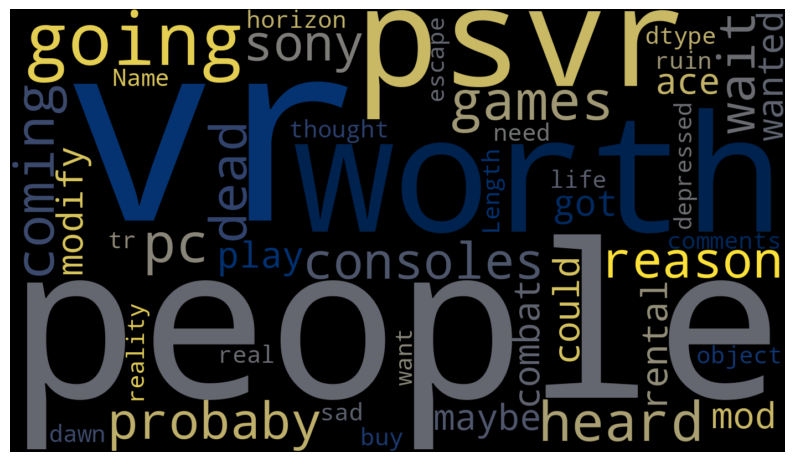

In [231]:
text_analysis('psvr_four_comments.txt')

In [232]:
likes('psvr_four.txt', 10, False)

,amount_of_likes,comment
0,56,I think by this point some where around 50% of...
1,7,I thought Horizon Dawn on the PSVR2 was going ...
2,7,I cracked the code. Facebook paid off Sony\nan...
3,6,I'm waiting to get into VR when there's more e...
4,6,I really like the headset. GT7 is incredible a...
5,5,Imagine claiming any device needs exclusive ti...
6,4,Still debating whether to get a psvr2. \n\nI M...
7,4,GT7 is boss but I'm right there with you that ...
8,4,8 months on and my decision to wait and see ab...
9,3,PSVR2 doesn't have vrchat. Quest 3 has vrchat....
